In [1]:
import os
import glob
import pandas as pd
from os import path

import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import sys  
sys.path.insert(0, '../')

from muwclass_library import confident_sigma

#import warnings
#warnings.filterwarnings('ignore')

class_labels = ['AGN','CV','HM-STAR','LM-STAR','HMXB','LMXB','NS','YSO']

class5_labels = ['AGN','HM-STAR','LM-STAR','YSO','CO']

plt.rcParams.update({'font.size': 25})
params = {'legend.fontsize': 'large',
          #'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
plt.rcParams.update(params)

def autolabel(rects, x_shift=0.,y_shift=0.):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if height != 0:
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2+x_shift, height+y_shift),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')  


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
df = pd.read_csv('./data/NGC3532_class_rgeo_lum.csv')
print(len(df))

df_mean = df[['P_'+c for c in class_labels]]
df_std = df[['e_P_'+c for c in class_labels]]
df_class = df_mean.idxmax(axis=1)
df_prob_mean = df_mean.max(axis=1)
df_prob_e = pd.DataFrame(data=[df_std.values[i][np.argmax(np.array(df_mean), axis=1)[i]]  for i in range(len(df_std))], columns=['Class_prob_e_2'])

df = pd.concat([df,df_class, df_prob_mean, df_prob_e],axis=1).rename(columns={0:'Class_2',1:'Class_prob_2'})
#print(df)
df['Class_2'] = df['Class_2'].str[2:]

df = confident_sigma(df, class_cols=class_labels,class_prob='Class_prob_2',class_prob_e='Class_prob_e_2').rename(columns={'CT':'CT8'})
df.to_csv('./data/NGC3532_class_previous.csv')

df_mean = df[['P_'+c for c in class5_labels]]
df_std = df[['e_P_'+c for c in class5_labels]]
df_class = df_mean.idxmax(axis=1)
df_prob_mean = df_mean.max(axis=1)
df_prob_e = pd.DataFrame(data=[df_std.values[i][np.argmax(np.array(df_mean), axis=1)[i]]  for i in range(len(df_std))], columns=['Class5_prob_e'])

df = pd.concat([df,df_class, df_prob_mean, df_prob_e],axis=1).rename(columns={0:'Class5',1:'Class5_prob'})
#print(df)
df['Class5'] = df['Class5'].str[2:]

df = confident_sigma(df, class_cols=class5_labels,class_prob='Class5_prob',class_prob_e='Class5_prob_e').rename(columns={'CT':'CT5'})



132


In [3]:
df[['P_'+c for c in class_labels]].sum(axis=1)[100:120]

100    1.0
101    1.0
102    1.0
103    1.0
104    1.0
105    1.0
106    1.0
107    1.0
108    1.0
109    1.0
110    1.0
111    1.0
112    1.0
113    1.0
114    1.0
115    1.0
116    1.0
117    1.0
118    1.0
119    1.0
dtype: float64

In [4]:
print(df.groupby(['Class','Class_2']).size())
df[df.CT8>=2].groupby(['Class','Class_2']).size()

Class                       Class_2
AGN                         AGN         7
HM-STAR                     HM-STAR     2
LM-STAR                     LM-STAR    40
LMXB                        LMXB        2
NS                          NS          1
Unconfident Classification  AGN         5
                            CV         11
                            HMXB        1
                            LM-STAR    16
                            LMXB       12
                            NS          4
                            YSO        22
YSO                         YSO         9
dtype: int64


Class    Class_2
AGN      AGN         7
HM-STAR  HM-STAR     2
LM-STAR  LM-STAR    40
LMXB     LMXB        2
NS       NS          1
YSO      YSO         9
dtype: int64

In [5]:
CSCv2_class = pd.read_csv('/home/orion51/Desktop/Research/MUWCLASS/MUWCLASS_pipeline_github/Results/CSCv2_Classifications/files/CSCv2_all_MW_classprob_XCLASS_good.csv')
#CSCv2_NGC3532 = CSCv2_class[CSCv2_class.name.isin(df['name'])].reset_index(drop=True)
print(CSCv2_class.columns[:30])
CSCv2_NGC3532 = pd.merge(df[['name','Class_2','CT8']], CSCv2_class[['name','Class','conf_sigma']], on='name',how='inner')
print(len(CSCv2_NGC3532))

Index(['P_AGN', 'P_CV', 'P_HM-STAR', 'P_HMXB', 'P_LM-STAR', 'P_LMXB', 'P_NS',
       'P_YSO', 'e_P_AGN', 'e_P_CV', 'e_P_HM-STAR', 'e_P_HMXB', 'e_P_LM-STAR',
       'e_P_LMXB', 'e_P_NS', 'e_P_YSO', 'Class', 'Class_prob', 'Class_prob_e',
       'name', 'conf_flag', 'conf_sigma', 'ra', 'dec', 'PU', 'Signif.', 'F_s',
       'F_m', 'F_h', 'F_b'],
      dtype='object')
70


/tmp/ipykernel_12312/1499417021.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  CSCv2_class = pd.read_csv('/home/orion51/Desktop/Research/MUWCLASS/MUWCLASS_pipeline_github/Results/CSCv2_Classifications/files/CSCv2_all_MW_classprob_XCLASS_good.csv')


In [6]:
#print(CSCv2_NGC3532.groupby(['Class_2','Class']).size())

print(len(CSCv2_NGC3532[CSCv2_NGC3532.CT8>=2]))
print(CSCv2_NGC3532[CSCv2_NGC3532.CT8>=2].groupby(['Class_2','Class']).size())
print(CSCv2_NGC3532.loc[(CSCv2_NGC3532.Class_2=='LM-STAR') & (CSCv2_NGC3532.Class=='HM-STAR'), ['CT8','conf_sigma']])

print(CSCv2_NGC3532[CSCv2_NGC3532.conf_sigma>=2].groupby(['Class_2','Class']).size())

31
Class_2  Class  
AGN      AGN         6
HM-STAR  HM-STAR     1
LM-STAR  HM-STAR     3
         LM-STAR    16
LMXB     LMXB        1
YSO      YSO         4
dtype: int64
         CT8  conf_sigma
6   1.250601    1.168131
11  5.481481    0.054656
45  4.972000    0.751639
67  5.846154    1.096161
Class_2  Class  
CV       CV         1
LM-STAR  LM-STAR    9
YSO      HM-STAR    1
         YSO        4
dtype: int64


In [7]:
# Counterparts 

#print(df.columns[50:150])

#'''
df['cp_flag'] = 1
df.loc[df[['Gmag','BPmag', 'RPmag', 'Jmag','Hmag', 'Kmag', 'W1mag', 'W2mag', 'W3mag']].isna().all(axis=1), 'cp_flag']=0

#print(df[df.CT8>=2]['cp_flag'].value_counts())
print(df.groupby(['Class_2','cp_flag']).size())
print(df[df.CT8>=2].groupby(['Class_2','cp_flag']).size())

#print(df[df.CT5>=2]['cp_flag'].value_counts())

#'''


Class_2  cp_flag
AGN      0          12
CV       1          11
HM-STAR  1           2
HMXB     1           1
LM-STAR  1          56
LMXB     0           5
         1           9
NS       0           5
YSO      1          31
dtype: int64
Class_2  cp_flag
AGN      0           7
HM-STAR  1           2
LM-STAR  1          40
LMXB     0           1
         1           1
NS       0           1
YSO      1           9
dtype: int64


In [8]:
print(df.groupby(['Class5','cp_flag']).size())
print(df[df.CT5>=2].groupby(['Class5','cp_flag']).size())

Class5   cp_flag
AGN      0          10
CO       0          12
         1          25
HM-STAR  1           2
LM-STAR  1          56
YSO      1          27
dtype: int64
Class5   cp_flag
AGN      0           7
CO       0           3
         1          12
HM-STAR  1           2
LM-STAR  1          40
YSO      1           6
dtype: int64


In [9]:
df.columns[:40]

Index(['name', 'Class', 'Class_prob', 'Class_prob_e', 'P_AGN', 'e_P_AGN',
       'P_CV', 'e_P_CV', 'P_HM-STAR', 'e_P_HM-STAR', 'P_HMXB', 'e_P_HMXB',
       'P_LM-STAR', 'e_P_LM-STAR', 'P_LMXB', 'e_P_LMXB', 'P_NS', 'e_P_NS',
       'P_YSO', 'e_P_YSO', 'P_CO', 'e_P_CO', 'Candidate_CO', 'ra', 'dec', 'PU',
       'significance', 'flux_flag', 'Fcsc_s', 'e_Fcsc_s', 'Fcsc_m', 'e_Fcsc_m',
       'Fcsc_h', 'e_Fcsc_h', 'flux_aper90_ave_b', 'e_flux_aper90_ave_b',
       'var_intra_prob', 'var_inter_prob', 'EDR3Name_gaia', 'source_id'],
      dtype='object')

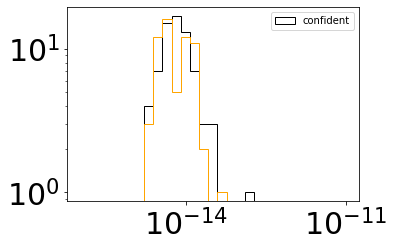

In [10]:
# X-ray fluxes


n_bins = 20

# Generate two normal distributions
dist1 = df.loc[df.CT5>=2, 'flux_aper90_ave_b']
dist2 = df.loc[df.CT5<2, 'flux_aper90_ave_b']

fig, axs = plt.subplots(1, 1, sharex=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs.hist(dist1, bins=10**(np.linspace(-16, -11, 30)),linestyle='solid',  color='black', histtype='step', stacked=False, fill=False,label='confident')
axs.hist(dist2, bins=10**(np.linspace(-16, -11, 30)),linestyle='solid',  color='orange', histtype='step', stacked=False, fill=False,)
axs.legend(loc='upper right',fontsize=10)
plt.xscale('log')
plt.yscale('log')

Class_2
[12, 0, 0, 0, 5, 5, 0, 0]
[12, 31, 56, 2, 5, 14, 11, 1]
Class_2
[7, 0, 0, 0, 1, 1, 0, 0]
[7, 9, 40, 2, 1, 2, 0, 0]


/tmp/ipykernel_12312/3225760408.py:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'./figs/{save_name}.png', bpi=300,bbox_inches='tight')
/tmp/ipykernel_12312/3225760408.py:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'./figs/{save_name}.png', bpi=300,bbox_inches='tight')


Class5
[10, 0, 0, 0, 12]
[10, 56, 2, 27, 37]
Class5
[7, 0, 0, 0, 3]
[7, 40, 2, 6, 15]


/tmp/ipykernel_12312/3225760408.py:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'./figs/{save_name}.png', bpi=300,bbox_inches='tight')
/tmp/ipykernel_12312/3225760408.py:40: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bpi" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(f'./figs/{save_name}.png', bpi=300,bbox_inches='tight')


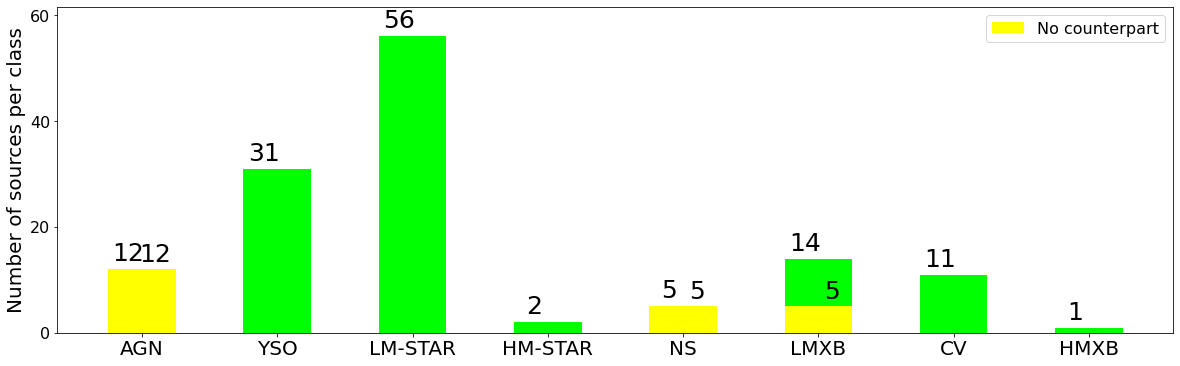

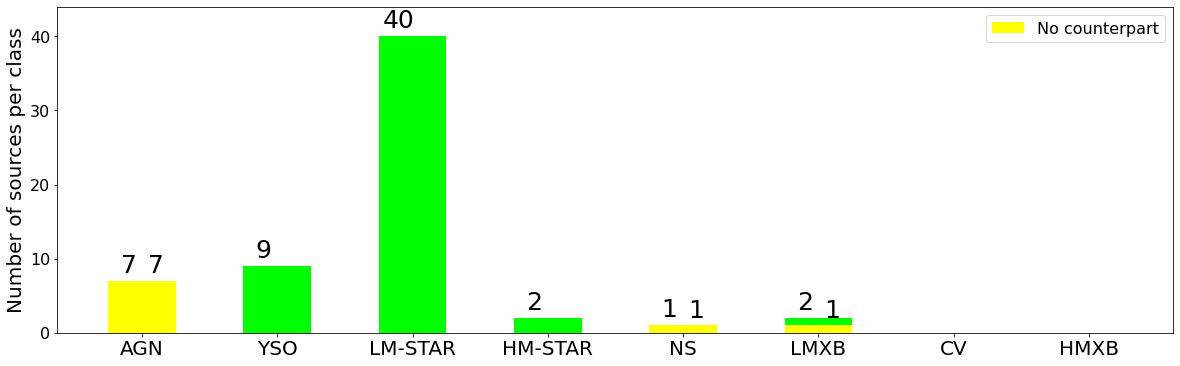

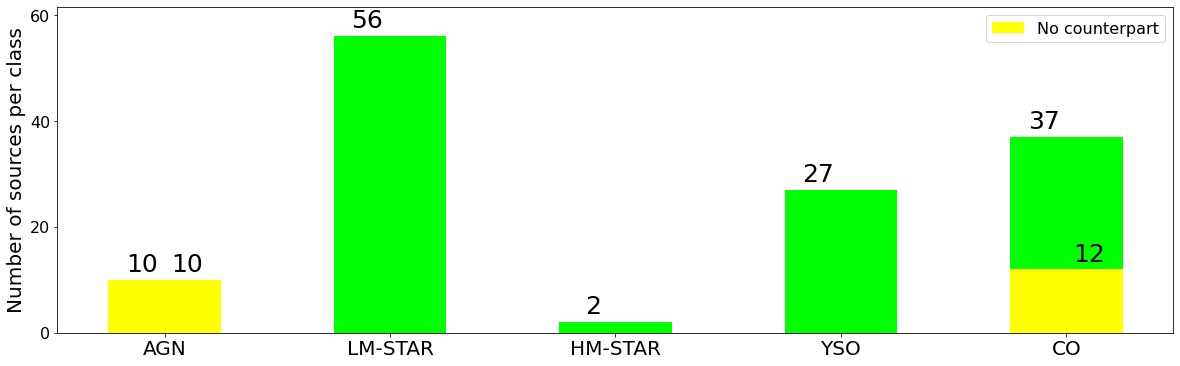

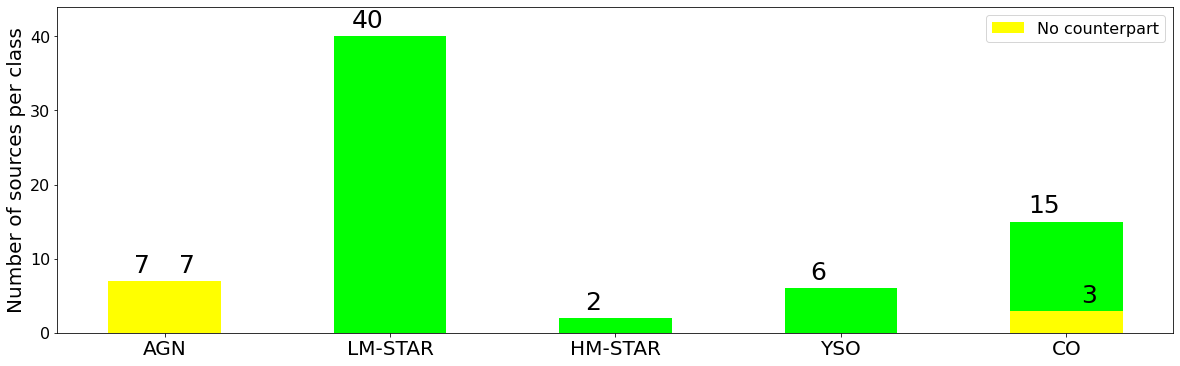

In [37]:
class8_labels = ['AGN','YSO','LM-STAR','HM-STAR','NS','LMXB','CV','HMXB']
class5_labels = ['AGN','LM-STAR','HM-STAR','YSO','CO']
for df_b, title, class_col, class_labels,save_name in zip([df, df[df.CT8>=2], df, df[df.CT5>=2]], [' ', 'ha', '', ''], ['Class_2','Class_2','Class5','Class5'], [class8_labels,class8_labels,class5_labels,class5_labels], ['class8_breakdown','class8_conf_breakdown','class5_breakdown','class5_conf_breakdown']):#, df_all[df_all.conf_flag>0], df_good, df_good[df_good.conf_flag>0]], ['all sources','confidently classified sources','good sources','confidently classified good sources']):
    
    print(class_col)
    cnt0 = Counter(df_b.loc[df_b.cp_flag==0, class_col])  
    counts0 = []
    for c in class_labels:
        counts0.append(cnt0[c])
    print(counts0)
    
    
    cnt1 = Counter(df_b[class_col]) 
    counts1 = []
    for c in class_labels:
        counts1.append(cnt1[c])
    print(counts1)
    
    x = np.arange(len(class_labels))  # the label locations
    width = 0.5  # the widt
    fig, ax = plt.subplots(figsize=(20,6))
    
    
    rects0 = plt.bar( class_labels, counts1, width, color='lime')
    rects1 = plt.bar( class_labels, counts0, width, color='yellow',label='No counterpart')
    

    ax.set_ylabel('Number of sources per class', fontsize=20)
    #ax.set_title(title,fontsize=20)
    ax.set_xticks(x)
    ax.set_xticklabels(class_labels, fontsize=20)
    #print(np.max(counts1)*1.2)
    ax.set_ylim(0, np.max(counts1)*1.1)
    plt.yticks(fontsize=16 )
    #plt.yscale('log')
    ax.legend(fontsize=16)
    
    autolabel(rects1,x_shift=0.1)
    autolabel(rects0,x_shift=-0.1,y_shift=0.1)
    plt.savefig(f'./figs/{save_name}.png', bpi=300,bbox_inches='tight')
    #plt.show()
    
    #for clas in class_labels:
        #print(f'{clas}: {len(df[(df.Class==clas) & (df.conf_sigma>=2.)])/len(df[(df_good.Class==clas)])}')
        #print(f'{clas}: {len(df[(df[class_col]==clas) & (df.conf_sigma>=2.)])/len(df[(df.conf_sigma>=2.)])}')
        

    